<a href="https://colab.research.google.com/github/A-R-M-028/Olympics-Data-Analysis/blob/main/Project_5__Olympics_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset

Athlete: https://drive.google.com/file/d/1y6e0eNKfyo9ILqQHszcrRuv3uQhIMm_z/view


NOC: https://drive.google.com/file/d/1_zGhADzXEA9mFHvuCvpllXMCN2DUE2tH/view

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the dattset

In [2]:
athlete = pd.read_csv('/content/drive/MyDrive/Projects/athlete_events.csv')
noc = pd.read_csv('/content/drive/MyDrive/Projects/noc_regions.csv')

# Creating copy of the DataFrame

In [3]:
ath = athlete.copy()
cou = noc.copy()

# Data Exploration

In [4]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [5]:
cou.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [6]:
ath.shape

(271116, 15)

In [7]:
cou.shape

(230, 3)

In [8]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
cou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [10]:
ath.isna().sum().sum()

363853

In [11]:
ath.isna().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
# Need to clean
Age         9474
Height     60171
Weight     62875
Medal     231333

In [12]:
# Find out the ratio b/w null and not null
n = ath['Medal'].isna().sum()
nn = ath['Medal'].notnull().sum()
print(n, ":", nn)

231333 : 39783


# Data Cleaning

In [13]:
# Find all the rows (Datapoints) in the NOC dataframe where region is NaN
cou.head(1)
cou[cou['region'].isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [14]:
cou.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [15]:
# Show all the rows from the athlete DataFrame where the region is ROT, TUV & UNK
ath.loc[ath['NOC'].isin([ 'ROT', 'TUV', 'UNK'])]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


In [16]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [17]:
# Add a column "Region" to the ath DataFrame. And the region column should have the region according to the elements in the NOC column of the countries DataFrame.
# Replace NOC with Region in ath
ath.columns
region = ath['NOC'].map(cou.set_index('NOC')['region'])
ath.insert(7, 'Region', region)

In [18]:
ath['Region']

0               China
1               China
2             Denmark
3             Denmark
4         Netherlands
             ...     
271111         Poland
271112         Poland
271113         Poland
271114         Poland
271115         Poland
Name: Region, Length: 271116, dtype: object

In [19]:
# Delete the NOC column from the ath DataFrame
cou.drop('NOC', axis = 1, inplace = True)

In [20]:
cou.head(1)

,region,notes
0,Afghanistan,NaN


***Handling the null values in the columns - Age, Height, Weight (From ath DataFrame)***

# Need to clean ♥
Age         9474

---


Height     60171

---


Weight     62875

---


Medal     231333

Age 9474

In [21]:
# Find the minimun, maximum age
ath.Age.min()
ath.Age.max()

97.0

In [22]:
ath.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [23]:
ath.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 271116 entries, 0 to 271115
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
261642 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [24]:
# Fill all the NaN values with the mean value of the Age column
ath.Age.fillna(ath.Age.mean(), inplace = True)

In [25]:
ath.Age.isna().sum()

0

In [26]:
# Change the datatype
ath.Age = ath.Age.astype('int')

Height 60171

In [27]:
ath.Height.describe()
# Here mean is 175
# Median is also 175
# Go with any of them

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [28]:
# ath.Height = ath.Height.fillna(ath.Height.mean(), inplace = True)
# ath.Weight = ath.Weight.fillna(ath.Weight.mean(), inplace = True)

ath["Height"].fillna(ath.Height.mean(), inplace = True)
ath["Weight"].fillna(ath.Weight.mean(), inplace = True)

In [29]:
ath.Height = ath.Height.astype('float')
ath.Weight = ath.Weight.astype('float')

In [30]:
ath.isna().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
Region       370
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Region       370

In [33]:
# List out all the values of the region columns where the values are null
ath[ath.Region.isna()]

,ID,Name,Gender,Age,Height,Weight,Team,Region,NOC,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21,175.33897,70.702393,Singapore,NaN,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25,175.33897,70.702393,Singapore,NaN,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28,173.00000,68.000000,Singapore,NaN,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24,170.00000,61.000000,Refugee Olympic Athletes,NaN,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21,180.00000,75.000000,Singapore,NaN,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26,182.00000,95.000000,Singapore,NaN,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,F,30,182.00000,95.000000,Singapore,NaN,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,F,21,163.00000,53.000000,Singapore,NaN,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,F,21,163.00000,53.000000,Singapore-1,NaN,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


In [35]:
# I nees only that columns
for i in ath[ath.Region.isna()].Team:
  print(i)

Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Refugee Olympic Athletes
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
June Climene
Singapore
Singapore
Singapore
Singapore
Singapore
June Climene
Unknown
Tuvalu
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Rika II
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Rika II
Singapore
Rika II
June Climene
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore-2
Rika II
Si

In [36]:
athCopy = ath.copy()

In [38]:
athCopy.Region.fillna('Team', inplace = True)

In [39]:
ath.Region.fillna('Team', inplace = True)

In [41]:
athCopy[athCopy['Region'].isna()]

,ID,Name,Gender,Age,Height,Weight,Team,Region,NOC,Games,Year,Season,City,Sport,Event,Medal


In [43]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.537438,175.33897,70.702393,1978.378480
std,39022.286345,6.281690,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


In [44]:
ath.isna().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
Region         0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Medal     231333

In [45]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,Region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [49]:
# Check the unique values
# Only 3 values and all are null
ath.Medal.unique() # All unique values
ath.Medal.unique() # Number of unique values
ath.Medal.value_counts() # Count the values

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
# Replace -> Numeric
# NaN -> 0
# Gold -> 1
# Silver -> 2
# Bronze -> 3

In [50]:
ath.Medal.replace([np.nan, 'Gold', 'Silver', 'Bronze'],[0, 1, 2, 3], inplace = True)

In [51]:
ath.Medal

0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 271116, dtype: int64

In [52]:
ath.Medal.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 271116, dtype: int64>

In [53]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  271116 non-null  object 
 8   NOC     271116 non-null  object 
 9   Games   271116 non-null  object 
 10  Year    271116 non-null  int64  
 11  Season  271116 non-null  object 
 12  City    271116 non-null  object 
 13  Sport   271116 non-null  object 
 14  Event   271116 non-null  object 
 15  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 33.1+ MB


In [59]:
ath.isna().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
Region    0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [ ]:
# Now all data has been cleaned

In [62]:
# Delete the columns - ID, Region, Games
ath.drop([ 'ID', 'Region', 'Games'], axis = 1, inplace = True)

In [63]:
ath.head(1)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0


In [66]:
# Remove the unwanted phrases from the "Event" Column
ath[['Sport', 'Event']].head(2)

,Sport,Event
0,Basketball,Basketball Men's Basketball
1,Judo,Judo Men's Extra-Lightweight


In [ ]:
# range in j'th as I need to go through individual index
# No need to define len as it auto given
for i,j in zip(ath.Sport, range(len(ath.Event))):
  ath.Event[j] = re.sub(f'^{i}\s', '', ath.Event[j])

In [78]:
for idx in range(len(ath['Sport'])):
    i = ath['Sport'][idx]
    j = ath['Event'][idx]
    ath['Event'][idx] = re.sub(f'^{i}\s', '', j)

<ipython-input-78-63d5b2ee41ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath['Event'][idx] = re.sub(f'^{i}\s', '', j)


0                     Men's Basketball
1              Men's Extra-Lightweight
2                       Men's Football
3                     Men's Tug-Of-War
4                   Women's 500 metres
                      ...             
271111           Mixed (Men)'s Doubles
271112    Men's Large Hill, Individual
271113          Men's Large Hill, Team
271114                      Men's Four
271115                      Men's Four
Name: Event, Length: 271116, dtype: object


In [79]:
ath.shape

(271116, 13)

In [80]:
ath.duplicated().sum()

1385

In [81]:
ath[ath.duplicated()]

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
1252,Dsir Antoine Acket,M,27,175.33897,70.702393,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Mixed Painting, Unknown Event",0
4282,William Truman Aldrich,M,48,175.33897,70.702393,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4283,William Truman Aldrich,M,48,175.33897,70.702393,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4862,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,GER,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Designs For Town Planning",0
4864,Hermann Reinhard Alker,M,43,175.33897,70.702393,Germany,GER,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Architectural Designs",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,GBR,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269995,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,GBR,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269997,Anna Katrina Zinkeisen (-Heseltine),F,46,175.33897,70.702393,Great Britain,GBR,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0
269999,Doris Clare Zinkeisen (-Johnstone),F,49,175.33897,70.702393,Great Britain,GBR,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0


In [82]:
ath.drop_duplicates(inplace = True)

In [83]:
ath.reset_index(inplace = True)

In [84]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Gender  269731 non-null  object 
 3   Age     269731 non-null  int64  
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Year    269731 non-null  int64  
 9   Season  269731 non-null  object 
 10  City    269731 non-null  object 
 11  Sport   269731 non-null  object 
 12  Event   269731 non-null  object 
 13  Medal   269731 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 28.8+ MB


In [88]:
ath.drop('index', axis = 1, inplace = True)

In [89]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,CHN,2012,Summer,London,Judo,Men's Extra-Lightweight,0


# Data Exportation

In [ ]:
# Export to JSON
ath.to_json('olympics_dataset.json')

# Export to Excel
ath.to_excel('olympics_dataset.xlsx')

# Export to JSON
ath.to_csv('olympics_dataset.csv')

In [ ]:
!pwd

In [130]:
ath.head(1)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Men's Basketball,0


# Data Analysis

Text(0.5, 1.0, 'Height vs Title')

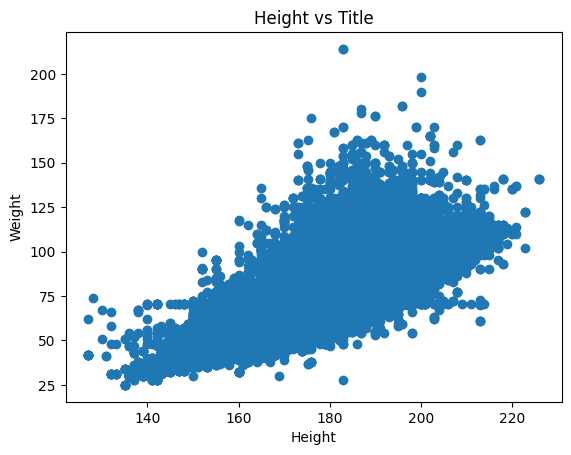

In [92]:
# Q1 Show the relationship b/w Height & Weight
plt.scatter(ath.Height, ath.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Title')

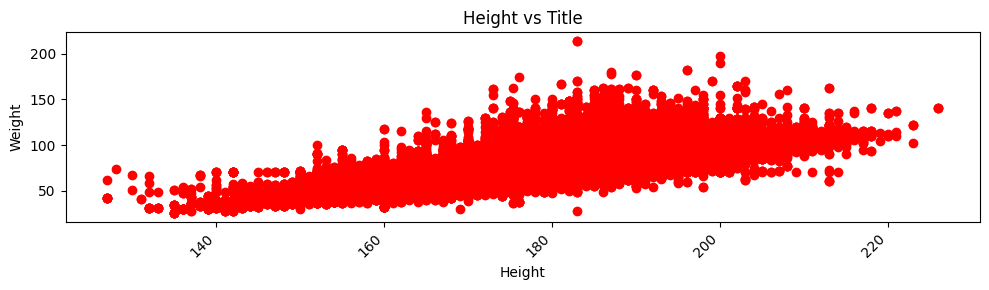

In [114]:
plt.figure(figsize = (10, 3))
plt.scatter(ath.Height, ath.Weight, color = 'red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Title')
plt.xticks(rotation = 45, ha = 'right') # Horizontal alignment
plt.tight_layout() # Making sure that the content is well-organized and not overlapping.
plt.show()

In [123]:
# Q2 Find out how many Male & Female has participated in the Olympics w.r.t. the given dataset (Data Visulisation)
ath.head(2)
male = ath['Gender'][ath.Gender == 'M'].count()
female = ath['Gender'][ath.Gender == 'F'].count()
print(male,":", female)

195353 : 74378


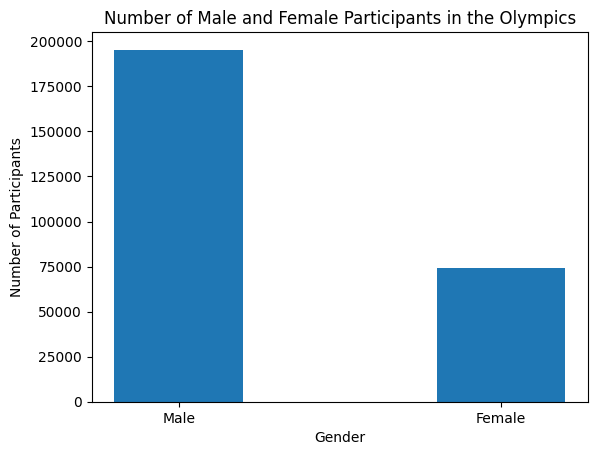

In [127]:
# Assuming 'ath' is the DataFrame with the Olympic dataset
male = ath['Gender'][ath.Gender == 'M'].count()
female = ath['Gender'][ath.Gender == 'F'].count()

# Data for the bar chart
genders = ['Male', 'Female']
counts = [male, female]

# Create the bar chart with reduced width and reduced gap
plt.bar(genders, counts, width=0.4)  # Adjust the width as needed

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.title('Number of Male and Female Participants in the Olympics')

# Adjusting the spacing between subplots to reduce the gap
plt.subplots_adjust(wspace=0.4)  # Adjust the wspace value as needed

# Show the plot
plt.show()


In [ ]:
# In Pandas, the 'and' keyword cannot be used directly with DataFrame boolean indexing. Instead,
# have to use the '&' operator to combine multiple conditions.

In [139]:
# Q3 How many Male and Female have participated in the Summer & Winter Olympics

# Number of male participants in the Summer Olympics
male_in_summer = ath[(ath['Gender'] == 'M') & (ath['Season'] == 'Summer')].shape[0]

# Number of female participants in the Summer Olympics
female_in_summer = ath[(ath['Gender'] == 'F') & (ath['Season'] == 'Summer')].shape[0]

# Number of male participants in the Winter Olympics
male_in_winter = ath[(ath['Gender'] == 'M') & (ath['Season'] == 'Winter')].shape[0]

# Number of female participants in the Winter Olympics
female_in_winter = ath[(ath['Gender'] == 'F') & (ath['Season'] == 'Winter')].shape[0]

161868


In [142]:
# Number of male participants in the Summer Olympics
male_in_summer = len(ath[(ath['Gender'] == 'M') & (ath['Season'] == 'Summer')])

# Number of female participants in the Summer Olympics
female_in_summer = len(ath[(ath['Gender'] == 'F') & (ath['Season'] == 'Summer')])

# Number of male participants in the Winter Olympics
male_in_winter = len(ath[(ath['Gender'] == 'M') & (ath['Season'] == 'Winter')])

# Number of female participants in the Winter Olympics
female_in_winter = len(ath[(ath['Gender'] == 'F') & (ath['Season'] == 'Winter')])

# Printing the results
print(f"Male participants in Summer Olympics: {male_in_summer}")
print(f"Female participants in Summer Olympics: {female_in_summer}")
print(f"Male participants in Winter Olympics: {male_in_winter}")
print(f"Female participants in Winter Olympics: {female_in_winter}")

print(f"Total Participants: {male_in_summer+female_in_summer+male_in_winter+female_in_winter}")

Male participants in Summer Olympics: 161868
Female participants in Summer Olympics: 59299
Male participants in Winter Olympics: 33485
Female participants in Winter Olympics: 15079
Total Participants: 269731


In [133]:
ath.head(1)

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Men's Basketball,0


In [153]:
# Name the Top 5 countries who're having the most medals

# Group the data by country (NOC) and calculate the total medals for each country
country_medals = ath.groupby('NOC')['Medal'].count()

# Sort the countries based on the total medals in descending order
sorted_countries = country_medals.sort_values(ascending=False)

# Take the top 5 countries with the most medals
top_5_countries = sorted_countries.nlargest(5)

# Print the top 5 countries with their medal count
print("Top 5 countries with the most medals:")
print(top_5_countries)

# Sum of all
print(f'{top_5_countries.sum()}')

Top 5 countries with the most medals:
NOC
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
Name: Medal, dtype: int64
63672


In [147]:
# How many medals did the Female athlete have won during the Summer Olympics?
female_in_winter = ath[(ath['Gender'] == 'F') & (ath['Season'] == 'Summer')].count()
female_in_winter.sum()
# WRONG -> Here program counting all filtered rows including non medals

770887

In [150]:
import pandas as pd

# Assuming 'ath' is the DataFrame with the Olympic dataset

# Filter the DataFrame for female athletes in the Summer Olympics
female_in_summer_df = ath[(ath['Gender'] == 'F') & (ath['Season'] == 'Summer')]

# Count the non-null values in the 'Medal' column for female athletes in the Summer Olympics
female_medals_in_summer = female_in_summer_df['Medal'].count()

# Printing the result
print(f"Number of medals won by female athletes in the Summer Olympics: {female_medals_in_summer}")

Number of medals won by female athletes in the Summer Olympics: 59299


In [97]:
# Name all the cities where the 2012 Olympics was held.
ath['City'][ath.Year == 2012].unique()

array(['London'], dtype=object)

In [102]:
# Name all the athletes who has participated in the game 'Judo'
ath[['Name', 'Sport']][ath.Sport == 'Judo']

,Name,Sport
1,A Lamusi,Judo
160,M'Bairo Abakar,Judo
180,Salim Abanoz,Judo
412,Mohamed Ali Abdelaal,Judo
435,Ahmed Abdelrahman,Judo
...,...,...
269468,Oleg Zurabiani,Judo
269533,Goran uvela,Judo
269596,Zurab Zviadauri,Judo
269647,Claudia Antoinette Zwiers,Judo
